In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#mount gdrive to access files in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#i added a shortcut to the Cleaned_2_data.csv file in a folder in my personal drive called cs_490
#change path for other users
df = pd.read_csv('/content/gdrive/MyDrive/cs_490/Cleaned_2_data.csv').dropna()
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
#function to be passed to df.apply() to calculate polarity and subjectivity of opinion
def calc_pol_and_sub(text):
  sent = TextBlob(text).sentiment
  polarity = sent.polarity
  subjectivity = sent.subjectivity
  return (polarity, subjectivity)

#apply calc_pol_and_sub down Opinion column and append results to df
pol_and_sub = df.apply(lambda row: calc_pol_and_sub(row['Opinion']), axis=1, result_type='expand')
pol_and_sub.rename(columns={0: 'polarity', 1: 'subjectivity'}, inplace=True)
df = pd.concat([df, pol_and_sub], axis=1)

In [ ]:
print(df)
print(df[['polarity', 'subjectivity']].describe())

#change path for other users
#uncomment to resave csv
#df.to_csv("/content/gdrive/MyDrive/cs_490/cleaned_2_with_pol_and_sub.csv")

      Court_id   Case_id                                            Opinion  \
0            1  21-01566  case document page date file entry i would uni...   
1            1  19-01622  case document page date file entry i would uni...   
2            1  20-01434  case document page date file entry i would uni...   
3            1  19-02104  case document page date file entry i would uni...   
4            1  20-01942  case document page date file entry i would uni...   
...        ...       ...                                                ...   
5995        12  21-05080  usca case document file page unite state court...   
5996        12  20-01045  usca case document file page unite state court...   
5997        12  19-05199  usca case document file page unite state court...   
5998        12  20-07110  usca case document file page unite state court...   
5999        12  18-03070  usca case document file page unite state court...   

      polarity  subjectivity  
0    -0.008936      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

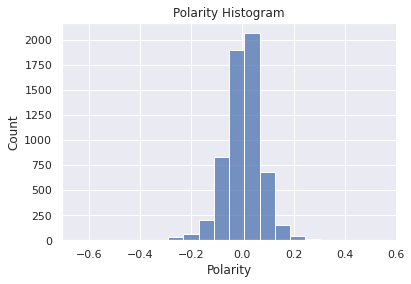

In [ ]:
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/cs_490/cleaned_2_with_pol_and_sub.csv')
sns.set(style="darkgrid")

sns.histplot(data=df, x="polarity", bins=20).set(title='Polarity Histogram')
plt.xlabel('Polarity')
files.download('polarity_histogram.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

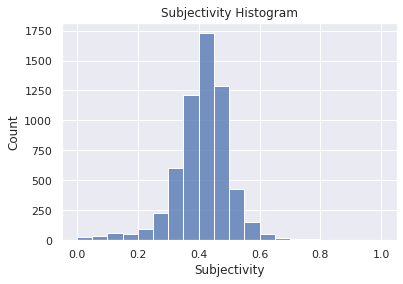

In [ ]:
sns.histplot(data=df, x='subjectivity', bins=20).set(title='Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.savefig('subjectivity_histogram.png')
files.download('subjectivity_histogram.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

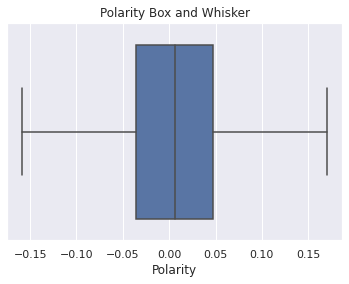

In [ ]:
sns.boxplot(data=df, x='polarity', showfliers=False).set(title='Polarity Box and Whisker')
plt.xlabel('Polarity')
plt.savefig('polarity_box_and_whisker.png')
files.download('polarity_box_and_whisker.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

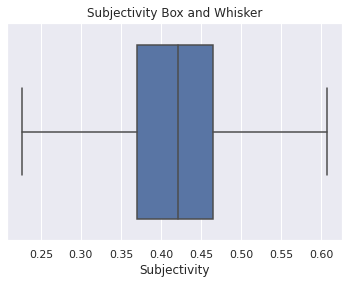

In [ ]:
sns.boxplot(data=df, x='subjectivity', showfliers=False).set(title='Subjectivity Box and Whisker')
plt.xlabel('Subjectivity')
plt.savefig('subjectivity_box_and_whisker.png')
files.download('subjectivity_box_and_whisker.png')
plt.show()